In [1]:
from tqdm import tqdm_notebook
from config import config
from util import utils

In [2]:
%matplotlib inline
import numpy as np
import skimage.io, skimage.transform
import matplotlib.pyplot as plt
import os
from PIL import Image

In [3]:
f = open(config.TRAIN_LABELS)
img_dir = config.TRAIN_DIR

In [4]:
lines = f.readlines()
img_list = []
for line in lines:
    temp = line.strip('\n').split(' ')
    img_name = temp[0]
    img_class = int(temp[1]) - 1
    img_list.append([img_name, img_class])
f.close()

In [5]:
indice_mask = np.random.permutation(len(img_list))
new_img_list = []
for i in tqdm_notebook(range(len(img_list))):
    img_file = img_dir + img_list[indice_mask[i]][0]
    img_class = img_list[indice_mask[i]][1]
    img = skimage.io.imread(img_file)        
    img_l = skimage.transform.resize(img, (400, 400), mode='edge', preserve_range=True)
    img_m = skimage.transform.resize(img, (299, 299), mode='edge', preserve_range=True)
    img_s = skimage.transform.resize(img, (224, 224), mode='edge', preserve_range=True)
    new_img_list.append([img, img_l, img_m, img_s, img_class])
img_list = new_img_list

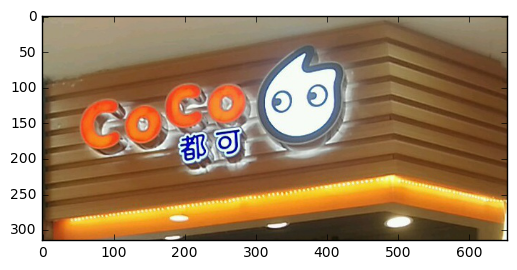

In [10]:
utils.show_img(img_list[1][0])